<a href="https://colab.research.google.com/github/geetayadav318/Play-store-data-analysis/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
#Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
#Explore and analyze the data to discover key factors responsible for app engagement and success.

In [7]:
# Import all the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
import plotly
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px

In [8]:
# Give path to access the data
path='/content/drive/MyDrive/Play Store App Review Analysis/Play Store Data.csv'

In [9]:
# Read files using pandas modules
df=pd.read_csv(path)

In [10]:
# Read the first five rows in the data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
#Read the last five rows of the data
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [12]:
#Check the shape of the data
df.shape

(10841, 13)

In [13]:
#Checking column names in the dataset
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [14]:
#Checking unique categories in the data
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [15]:
#Total number of unique categories
df['Category'].nunique()

34

In [16]:
# Viewing the content rating; who is permitted to download these apps
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [18]:
#Checking information about data ---> white lines shows the missing rows in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


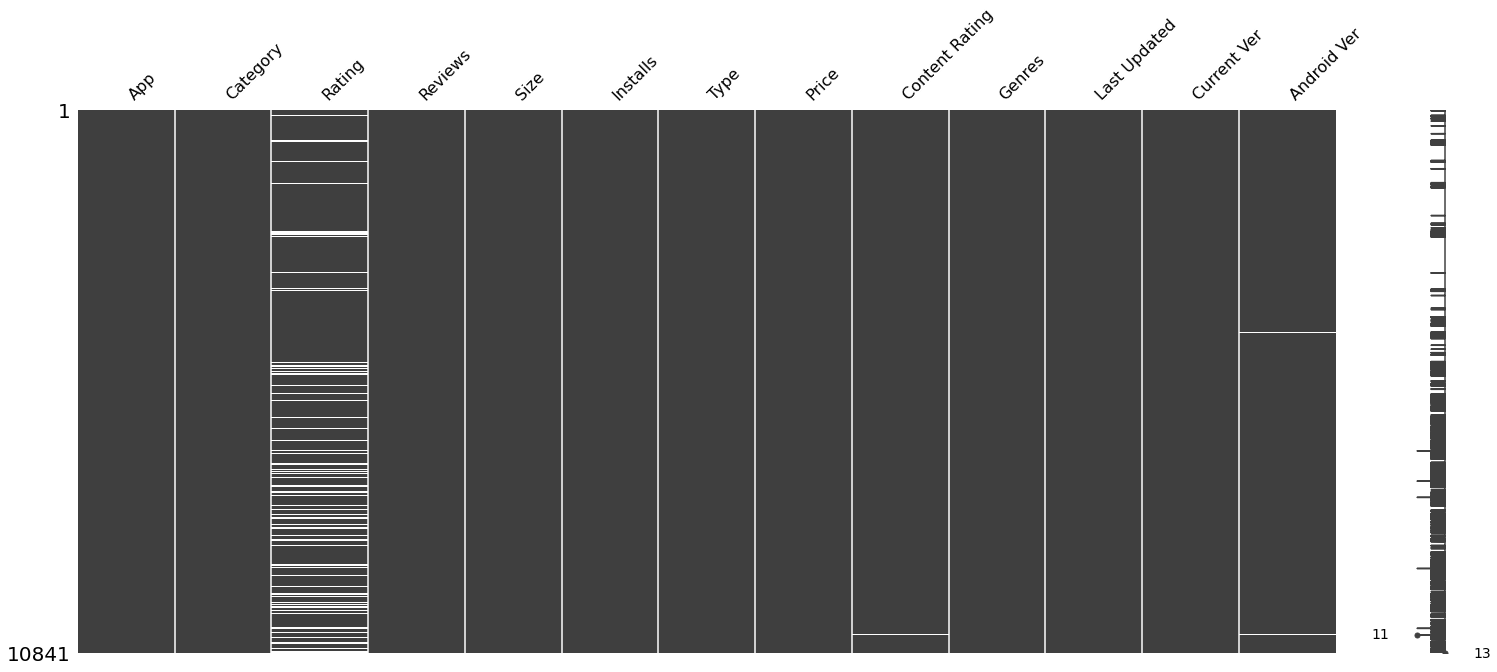

In [19]:
msno.matrix(df)

From the matrix above, the data contains missing values

In [20]:
#Dropping missing values in the data
df=df.dropna()

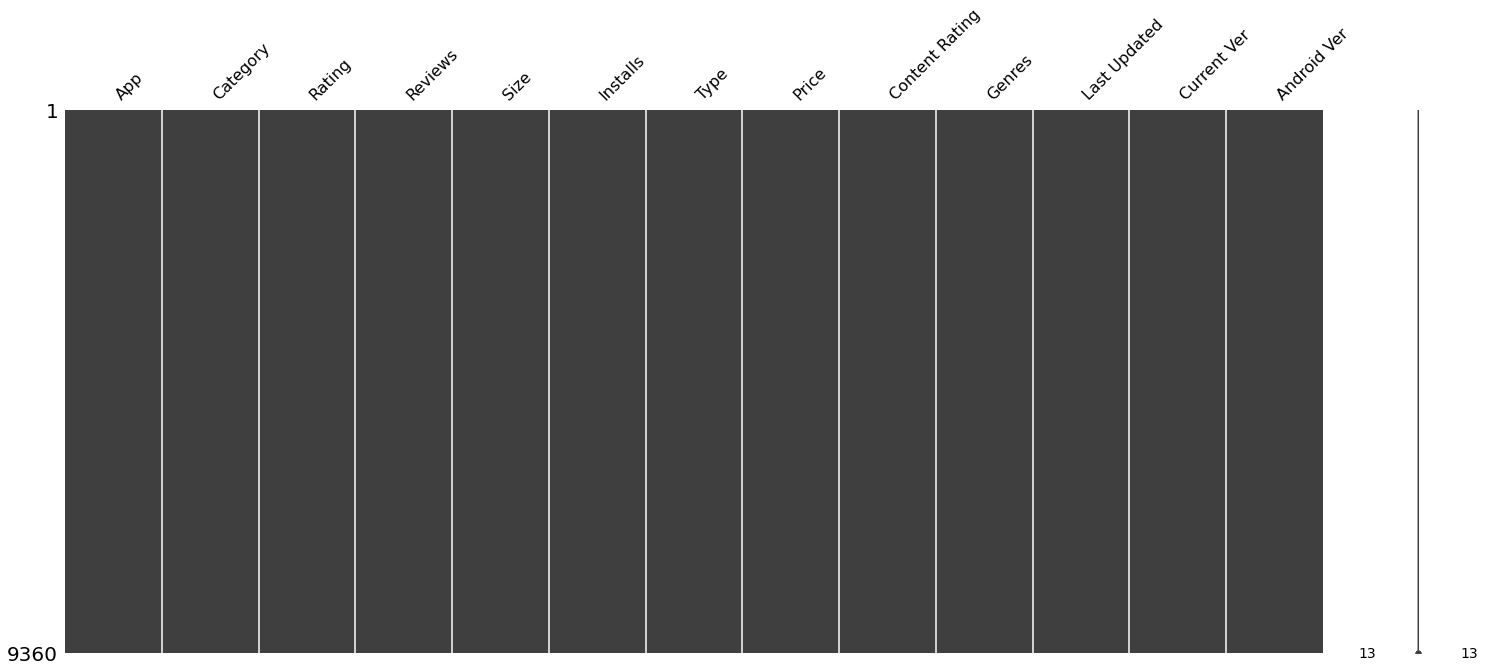

In [21]:
# Checking again for missing values in the data
msno.matrix(df)

Above plot shows new data has no missing values

In [22]:
#Dropping duplicated rows
#On play store, two apps may have same name, but all the size, installs, rating, reviews, price need not be same. so using these categories, we will drop the duplicates in the data
df.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price','Android Ver'], inplace=True)

In [23]:
#Check the column of Genres is dropped
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
#Now check new data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8878 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8878 non-null   object 
 1   Category        8878 non-null   object 
 2   Rating          8878 non-null   float64
 3   Reviews         8878 non-null   object 
 4   Size            8878 non-null   object 
 5   Installs        8878 non-null   object 
 6   Type            8878 non-null   object 
 7   Price           8878 non-null   object 
 8   Content Rating  8878 non-null   object 
 9   Genres          8878 non-null   object 
 10  Last Updated    8878 non-null   object 
 11  Current Ver     8878 non-null   object 
 12  Android Ver     8878 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.0+ KB


In [25]:
#Checking each column in the data for null values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [26]:
#Ensuring there are no longer missing values
df.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [27]:
#Again check for the shape of new formed data frame
df.shape

(8878, 13)

In [28]:
len(df['App'])

8878

In [29]:
#There are 8878 rows, so we set new index in the range (0,8884,1)
# First we create a column named id in the given dataframe
id=np.arange(8878)
df['id']=id

In [30]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,id
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4


In [31]:
#set the index for dataframe
df=df.set_index('id')

In [32]:
#Checking unique categories in the Type of the Apps
df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [33]:
# Converting the data in the column "Reviews" to float to that we can apply statistics

df.Reviews= df.Reviews.astype(float) 

In [34]:
# To convert the column "Installs" into float

# So, firstly remove the "+"
 
df.Installs= df["Installs"].str.replace("+", "")

In [35]:
# While converting the column into float,we have to remove ',' to

# So, removing the commas

df.Installs= df["Installs"].str.replace(",", "")

In [36]:
df["Installs"] = pd.to_numeric(df["Installs"])

In [37]:
# Removing "$" from the data entries in the column "Price" so that it can be converted to float

df["Price"]= df["Price"].str.replace("$", "")

In [38]:
# Convert the data in "Price" to float


df["Price"]= df.Price.astype(float)

In [39]:
# the data in the column "Prices" successfully converted to float

# In these columns i can do various statistical applications
df.describe()

,Rating,Reviews,Installs,Price
count,8878.000000,8.878000e+03,8.878000e+03,8878.000000
mean,4.187745,4.729619e+05,1.649903e+07,0.963719
std,0.522572,2.906987e+06,8.643798e+07,16.201978
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.640000e+02,1.000000e+04,0.000000
50%,4.300000,4.708000e+03,5.000000e+05,0.000000
75%,4.500000,7.119725e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


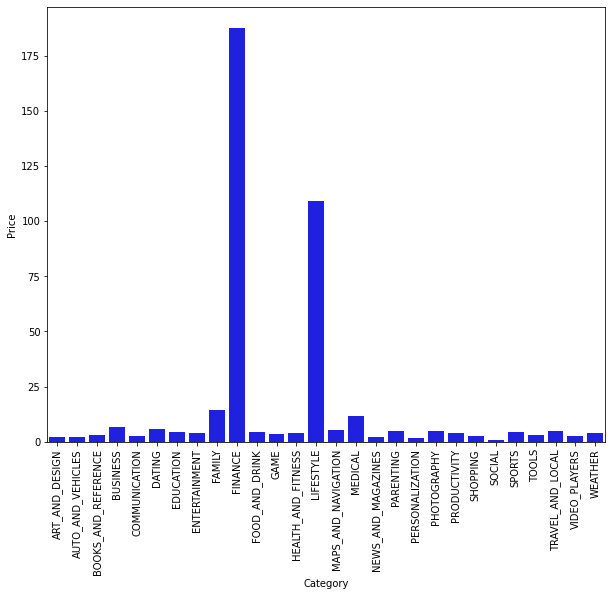

In [ ]:
Paid_apps=df[df.Type=='Paid']
Paid_apps=Paid_apps.groupby('Category').mean().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x="Category", y="Price", data=Paid_apps,
            label="Price", color="b")
plt.xticks(rotation=90)
plt.show()

Number of installation vs type of app

In [ ]:
fig = go.Figure()
trace0 = go.Box(
  # Data for paid apps
  y=df['Installs'][df['Type'] == 'Paid'],
  name = 'Paid'
)
trace1 = go.Box(
  # Data for free apps
  y=df['Installs'][df['Type'] == 'Free'],
  name = 'Free'
)
layout = go.Layout(
  title = "Number of downloads of paid apps vs. free apps",
  yaxis = dict(
  type = 'log',
  autorange = True
)
)
# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})
fig = px.box(df, x="Type", y="Rating")
fig.show()